In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

import mtg

In [5]:
past_games = mtg.PastGames()

/home/mson/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mson/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: l2_lambda
[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[1]	training's binary_logloss: 0.690985	valid_1's binary_logloss: 0.691162
[2]	training's binary_logloss: 0.689086	valid_1's binary_logloss: 0.689383
[3]	training's binary_logloss: 0.687338	valid_1's binary_logloss: 0.687679
[4]	training's binary_logloss: 0.685845	valid_1's binary_logloss: 0.686323
[5]	training's binary_logloss: 0.684501	valid_1's binary_logloss: 0.685007
[6]	training's binary_logloss: 0.68322	valid_1's binary_logloss: 0.683867
[7]	training's binary_logloss: 0.681762	valid_1's binary_logloss: 0.682466
[8]	training's binary_logloss: 0.680689	valid_1's binary_logloss: 0.681548
[9]	training's binary_logloss: 0.67929	valid_1's binary_logloss: 0.680198
[10]	training's binary_logloss: 0.678426	valid_1's binary_logloss: 0.679316
[11]	training's binary_logloss: 0.677585	valid_1's binary_logloss: 0.678537
[12

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

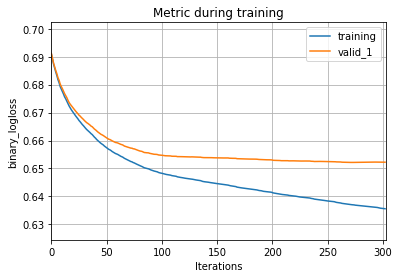

In [6]:
lgb_params = {'objective': 'binary', 'num_leaves': 32, 'l2_lambda': 0.3, 'max_depth': -1}

model = lgb.LGBMClassifier(**lgb_params, num_boost_round=1000)
trn, val = past_games.dsets.sets['trn'], past_games.dsets.sets['val']
model.fit(**past_games.dsets.sets['trn'], eval_set=[(trn['X'], trn['y']), (val['X'], val['y'])],
          early_stopping_rounds=30)

lgb.plot_metric(model)

In [7]:

pred = model.predict(past_games.dsets.sets['tst']['X'])
roc_auc_score(y_true=past_games.dsets.sets['tst']['y'], y_score=pred)

0.6101216753372264

In [8]:
rival_deck = mtg.RivalDeck(past_games)

In [9]:
rival_deck.deck

,Alessin_Adamant_Angel,Bold_Battalion,Dreadwing_Darkfire_Dragon,Evil_Emperor_Eschatonus_Empyreal_Envoy_of_Entropic_End,Gentle_Guard,Horrible_Hooligan,Kindly_Knight,Lilac_Lotus,Murderous_Minotaur,Patchy_Pirate,Sword_of_Shadows,Virtuous_Vigilante
0,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
past_games.cards

['Alessin_Adamant_Angel',
 'Bold_Battalion',
 'Dreadwing_Darkfire_Dragon',
 'Evil_Emperor_Eschatonus_Empyreal_Envoy_of_Entropic_End',
 'Gentle_Guard',
 'Horrible_Hooligan',
 'Kindly_Knight',
 'Lilac_Lotus',
 'Murderous_Minotaur',
 'Patchy_Pirate',
 'Sword_of_Shadows',
 'Virtuous_Vigilante']

In [61]:
possibles = mtg.PossibleDecks(past_games)
decks = possibles.generate_decks()

In [62]:
decks

,Alessin_Adamant_Angel,Bold_Battalion,Dreadwing_Darkfire_Dragon,Evil_Emperor_Eschatonus_Empyreal_Envoy_of_Entropic_End,Gentle_Guard,Horrible_Hooligan,Kindly_Knight,Lilac_Lotus,Murderous_Minotaur,Patchy_Pirate,Sword_of_Shadows,Virtuous_Vigilante
0,0,1,0,3,0,0,1,1,1,0,2,3
1,1,1,1,4,1,0,1,1,2,0,0,0
2,1,0,0,2,3,0,4,0,1,0,1,0
3,0,0,1,0,3,5,0,1,2,0,0,0
4,0,1,1,0,0,0,2,3,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1352073,2,1,0,0,0,0,0,4,4,1,0,0
1352074,0,0,0,2,1,1,0,2,2,2,1,1
1352075,0,0,3,0,2,0,1,0,1,0,0,5
1352076,0,0,1,1,0,4,0,1,0,2,3,0
